# BIOGENESYS
La empresa farmacéutica BIOGENESYS busca identificar las ubicaciones óptimas para la expansión de laboratorios farmacéuticos, basándose en el análisis de datos de incidencia de COVID-19, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias. La meta es optimizar la respuesta a los efectos de la pandemia y postpandemia con el fin de mejorar el acceso a las vacunas.

## Avance 1

In [1]:
# Importación de librerías 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Cargamos nuestro dataset

In [2]:
# Cargar el archivo CSV
data = pd.read_csv("data_latinoamerica.csv")

Con `.shape` obtenemos la cantidad de registros y columnas que tiene el archivo.  
Esto es importante porque nos permite confirmar que la carga se hizo correctamente.  
En este caso, el archivo tiene más de 12 millones de filas y 50 columnas.

In [3]:
# Mostrar la cantidad de filas y columnas del dataset
print("Cantidad de filas y columnas:")
print(data.shape)

Cantidad de filas y columnas:
(12216057, 50)


La función `head()` muestra las primeras 5 filas de la tabla.  
Esto nos ayuda a ver cómo están organizados los datos, cuáles son las columnas y qué tipo de información contiene cada una.


In [4]:
data.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


Creamos una lista con los seis países que nos interesan para el análisis: Argentina, Chile, Colombia, México, Perú y Brasil. Luego filtramos el dataset para quedarnos únicamente con los registros correspondientes a esos países.

In [5]:
# Seleccionamos solo los países relevantes
paises_solicitados=["Argentina","Chile","Colombia","Mexico","Peru","Brazil"]
data_latam=data[data["country_name"].isin(paises_solicitados)]


In [6]:
# Verificamos el tamaño del dataset filtrado por país
data_latam.shape

(11970289, 50)

Ahora nos quedamos solo con los datos que tienen una fecha mayor al 01-01-2021. Esto nos permite trabajar únicamente con información más reciente y relevante para la empresa.

In [7]:
data_latam_fecha=data_latam[data_latam["date"]>"2021-01-01"]

In [8]:
# Visualizamos un fragmento de los datos filtrados por país y fecha
data_latam_fecha

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
371,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12136772,PE_UCA_0401,2022-09-13,PE,Peru,NaN,NaN,NaN,NaN,NaN,2860.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12136773,PE_UCA_0401,2022-09-14,PE,Peru,NaN,NaN,NaN,NaN,NaN,2860.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12136774,PE_UCA_0401,2022-09-15,PE,Peru,NaN,NaN,NaN,NaN,NaN,2860.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12136775,PE_UCA_0401,2022-09-16,PE,Peru,NaN,NaN,NaN,NaN,NaN,2860.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Contamos los valores nulos de cada columna y filtramos aquellas que superan los 4 millones de datos faltantes. Esto nos ayuda a identificar variables que podrían ser eliminadas o tratadas con cuidado porque tienen poca información útil.

In [9]:
# Identificamos columnas con demasiados valores nulos
data_latam_fecha.isnull().sum()[data_latam_fecha.isnull().sum()>4000000]

cumulative_vaccine_doses_administered    7274069
population_rural                         7533552
population_urban                         7533552
population_density                       7533552
human_development_index                  4075344
gdp_usd                                  7532928
gdp_per_capita_usd                       7532304
smoking_prevalence                       7533552
diabetes_prevalence                      7533552
infant_mortality_rate                    7533552
nurses_per_1000                          7533552
physicians_per_1000                      7533552
population_largest_city                  7533552
area_rural_sq_km                         7533552
area_urban_sq_km                         7533552
life_expectancy                          7533552
adult_male_mortality_rate                7533552
adult_female_mortality_rate              7533552
pollution_mortality_rate                 7533552
comorbidity_mortality_rate               7533552
new_recovered       

Con esta visualización comprobamos cuántos datos quedaron por país después de aplicar los filtros. Esto nos permite ver si los datos están distribuidos de manera equilibrada entre los seis países.

In [10]:
# Verificamos la cantidad de registros por país
data_latam['country_name'].value_counts()


country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64

Además del nombre del país, también usamos el código estándar `location_key` para asegurar que solo estamos incluyendo los registros centrales de cada país, evitando subdivisiones o duplicados.

In [11]:
data_latam_paises=data_latam_fecha[data_latam_fecha["location_key"].isin(["AR","CL","CO","MX","PE","BR"])]
data_latam_fecha.shape

(7537296, 50)

In [12]:
# Confirmamos el tamaño final del dataset
data_latam_paises.shape

(3744, 50)

Contamos cuántos datos faltantes hay en cada columna del dataset final. Esta información es clave para decidir cómo vamos a rellenar esos valores: ya sea con la media, ceros o eliminándolos si son pocos.

In [13]:
valores_nulos_fecha =data_latam_paises.isnull().sum()[data_latam_paises.isnull().sum()>0]
print(valores_nulos_fecha)

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


Las columnas relacionadas con el clima pueden tener variaciones normales, por lo que es válido rellenar sus valores nulos con la media. Esto ayuda a mantener consistencia en el análisis sin perder registros importantes.

In [14]:
# Rellenamos con la media las columnas climáticas
columnas_media = [
    'average_temperature_celsius',
    'minimum_temperature_celsius',
    'maximum_temperature_celsius',
    'rainfall_mm',
    'relative_humidity'
]

for col in columnas_media:
    media = data_latam_paises[col].mean()
    data_latam_paises[col] = data_latam_paises[col].fillna(media)


C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\2934189472.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises[col] = data_latam_paises[col].fillna(media)


En estos casos, un valor nulo probablemente indica que no hubo actividad registrada ese día. Por eso, rellenar con cero es una estrategia segura para conservar los datos y no alterar el análisis.


In [15]:
# Rellenamos con cero los valores de recuperación y vacunación
columnas_cero = [
    'cumulative_vaccine_doses_administered',
    'new_recovered',
    'cumulative_recovered'
]

for col in columnas_cero:
    data_latam_paises[col] = data_latam_paises[col].fillna(0)


C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\4013440615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises[col] = data_latam_paises[col].fillna(0)


In [16]:
data_latam_paises.isnull().sum()[data_latam_paises.isnull().sum() > 0]


new_confirmed           21
new_deceased            21
cumulative_confirmed    21
cumulative_deceased     21
dtype: int64

Realizamos un análisis descriptivo general del dataset filtrado. Esto nos permite entender la distribución de los datos y detectar posibles valores extremos, errores de carga o comportamientos inusuales. Para ello usamos el método `.describe()` de Pandas.


In [17]:
#Análisis exploratorio de variables clave
data_latam_paises.describe()

,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
count,3723.000000,3723.000000,3.723000e+03,3723.000000,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,3.744000e+03,...,3.744000e+03,3.744000e+03,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3.744000e+03
mean,13936.279613,277.164115,6.784382e+06,193136.784045,6.544474e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,...,1.443888e+07,2.636580e+06,59502.500000,76.808500,154.274667,81.428000,36.566667,14.816667,8263.612179,3.894398e+06
std,24273.618006,508.449365,7.999625e+06,183022.316718,9.247680e+07,6.713776e+07,3.318494e+07,3.448407e+07,1.008074e+07,5.829529e+07,...,5.710077e+06,2.584740e+06,45125.320206,1.597394,27.000146,11.800623,13.027569,1.665972,23049.011844,8.418383e+06
min,-573.000000,0.000000,9.710000e+02,1.000000,0.000000e+00,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,...,6.723516e+06,7.094180e+05,12027.000000,74.992000,107.669000,59.035000,25.300000,12.400000,-31119.000000,0.000000e+00
25%,1530.500000,25.500000,2.129800e+06,59225.000000,2.618297e+06,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,2.539034e+07,...,1.055471e+07,1.090598e+06,16425.000000,75.672000,146.370000,77.999000,26.600000,12.600000,0.000000,0.000000e+00
50%,5176.000000,99.000000,3.633546e+06,139636.000000,3.244576e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,...,1.291832e+07,1.543881e+06,45582.000000,76.518000,149.351000,82.149000,33.300000,15.750000,0.000000,0.000000e+00
75%,14915.000000,313.500000,6.223497e+06,215123.500000,7.478108e+07,1.109920e+08,5.485523e+07,5.748131e+07,2.494867e+07,1.026269e+08,...,2.167191e+07,2.690269e+06,102418.000000,77.109000,184.379000,91.421000,37.000000,15.800000,1830.500000,2.136215e+06
max,298408.000000,11447.000000,3.456883e+07,685203.000000,3.478685e+08,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,1.832416e+08,...,2.184651e+07,8.241430e+06,134981.000000,80.042000,188.528000,95.815000,63.900000,16.600000,282957.000000,3.370623e+07


Utilizamos un bucle `for` para recorrer los países y calcular métricas estadísticas relevantes. Este enfoque nos permite comparar rápidamente valores como el promedio de casos nuevos entre países, usando filtros y funciones agregadas de Pandas.

In [18]:
# Calcular el promedio de casos nuevos por país usando un bucle for
for pais in data_latam_paises["country_name"].unique():
    promedio = data_latam_paises[data_latam_paises["country_name"] == pais]["new_confirmed"].mean()
    print(f"Promedio de casos nuevos en {pais}: {promedio:.2f}")

Promedio de casos nuevos en Argentina: 12911.39
Promedio de casos nuevos en Brazil: 43196.55
Promedio de casos nuevos en Chile: 6109.25
Promedio de casos nuevos en Colombia: 7407.41
Promedio de casos nuevos en Mexico: 8874.67
Promedio de casos nuevos en Peru: 5032.18


Creamos una función personalizada que recorre cada columna numérica del dataset filtrado y calcula tres medidas estadísticas importantes: Mediana, Varianza y Rango. Estas métricas nos ayudan a entender la variabilidad y consistencia de cada variable. La función imprime los resultados para facilitar su revisión.

In [19]:
#Función para obtener mediana, varianza y rango
def resumen_estadistico(dataframe):
    for columna in dataframe.columns:
        if dataframe[columna].dtype in ['float64', 'int64']:
            mediana = dataframe[columna].median()
            varianza = dataframe[columna].var()
            rango = dataframe[columna].max() - dataframe[columna].min()
            print(f"{columna}")
            print(f"  Mediana: {mediana}")
            print(f"  Varianza: {varianza}")
            print(f"  Rango: {rango}")
            print("-" * 40)

# Aplicar la función
resumen_estadistico(data_latam_paises)


new_confirmed
  Mediana: 5176.0
  Varianza: 589208531.1036869
  Rango: 298981.0
----------------------------------------
new_deceased
  Mediana: 99.0
  Varianza: 258520.75677747422
  Rango: 11447.0
----------------------------------------
cumulative_confirmed
  Mediana: 3633546.0
  Varianza: 63994005722816.09
  Rango: 34567862.0
----------------------------------------
cumulative_deceased
  Mediana: 139636.0
  Varianza: 33497168416.87168
  Rango: 685202.0
----------------------------------------
cumulative_vaccine_doses_administered
  Mediana: 32445756.5
  Varianza: 8551958275078892.0
  Rango: 347868481.0
----------------------------------------
population
  Mediana: 47910798.0
  Varianza: 4507478439615793.0
  Rango: 194985406.0
----------------------------------------
population_male
  Mediana: 22254165.0
  Varianza: 1101239940970119.2
  Rango: 95463769.0
----------------------------------------
population_female
  Mediana: 23245825.0
  Varianza: 1189151109519313.2
  Rango: 99521637.0

In [117]:
# Guardar el DataFrame final en un archivo CSV
data_latam_paises.to_csv("DatosFinalesFiltrado.csv", index=False)


# Avance 2 – Análisis Estadístico y Visualización


Cargamos el dataset limpio y filtrado previamente. Este archivo contiene únicamente los datos relevantes para los países seleccionados y ya está libre de valores nulos en las columnas clave.

In [20]:
df_final = pd.read_csv("DatosFinalesFiltrado.csv")

In [21]:
df_final.shape

(3744, 50)

Agrupamos los datos por país para calcular métricas estadísticas como: Media, mediana, varianza y desviación estándar

In [22]:
# Agrupar por país y calcular estadísticas: media, mediana, varianza, std y rango
estadisticas_pais = df_final.groupby('country_name').agg({
    'new_confirmed': ['mean', 'median', 'var', 'std', lambda x: x.max() - x.min()],
    'cumulative_vaccine_doses_administered': ['mean', 'median', 'var', 'std', lambda x: x.max() - x.min()],
    'average_temperature_celsius': ['mean', 'median', 'var', 'std', lambda x: x.max() - x.min()]
})

# Mostrar la tabla
estadisticas_pais

new_confirmed                                                  \
                      mean   median           var           std <lambda_0>   
country_name                                                                 
Argentina     12911.385484   5180.0  5.569590e+08  23599.978107   174174.0   
Brazil        43196.551447  32507.5  1.568721e+09  39607.083631   298981.0   
Chile          6109.245161   4208.5  4.643572e+07   6814.375820    38173.0   
Colombia       7407.414516   2502.5  8.559784e+07   9251.910044    40415.0   
Mexico         8874.673108   4217.0  1.449320e+08  12038.769531    80810.0   
Peru           5032.183871   2193.0  6.438283e+07   8023.891264    58128.0   

             cumulative_vaccine_doses_administered                             \
                                              mean       median           var   
country_name                                                                    
Argentina                             3.455602e+07   27074120.5  1.333309e+15   
Brazil                                2.124233e+08  272342377.5  1.692489e+16   
Chile                                 3.494980e+07   38086370.5  3.830539e+14   
Colombia                              1.996348e+07     534729.0  7.735639e+14   
Mexico                                5.272062e+07   11549150.5  4.499511e+15   
Peru                                  3.805518e+07   36415446.5  9.561880e+14   

                                        average_temperature_celsius  \
                       std   <lambda_0>                        mean   
country_name                                                          
Argentina     3.651450e+07  109204825.0                   17.217785   
Brazil        1.300957e+08  347868481.0                   27.933883   
Chile         1.957176e+07   62204235.0                   15.302115   
Colombia      2.781302e+07   87566541.0                   20.204339   
Mexico        6.707839e+07  209673612.0                   19.475605   
Peru          3.092229e+07   83624934.0                   25.981607   

                                                         
                 median        var       std <lambda_0>  
country_name                                             
Argentina     16.749692  38.810461  6.229804  29.660494  
Brazil        27.699074   9.130475  3.021668  21.694445  
Chile         14.819444  27.435685  5.237908  22.072223  
Colombia      20.802778   6.319500  2.513862  13.022223  
Mexico        19.918982   9.783725  3.127895  16.713888  
Peru          25.944444   3.831804  1.957499  11.488889

Este histograma de densidad nos permite comparar cómo se distribuyen los nuevos casos confirmados (`new_confirmed`) entre los seis países seleccionados. Esto puede indicar un comportamiento más variable o picos más pronunciados en ciertos periodos.

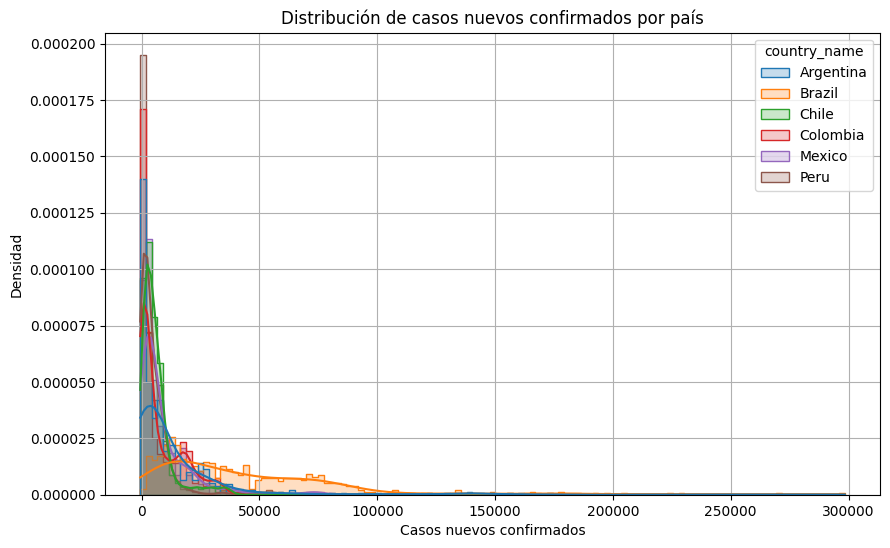

In [23]:
# Histograma de densidad de casos nuevos confirmados
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='new_confirmed', hue='country_name', kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribución de casos nuevos confirmados por país')
plt.xlabel('Casos nuevos confirmados')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

Este gráfico de dispersión muestra la relación entre la temperatura promedio (`average_temperature_celsius`) y los casos nuevos confirmados (`new_confirmed`) por país. Nos ayuda a explorar si existe alguna relación aparente entre el clima y la incidencia del COVID-19. Aunque no hay una correlación lineal clara, sí se observan agrupamientos particulares por país.

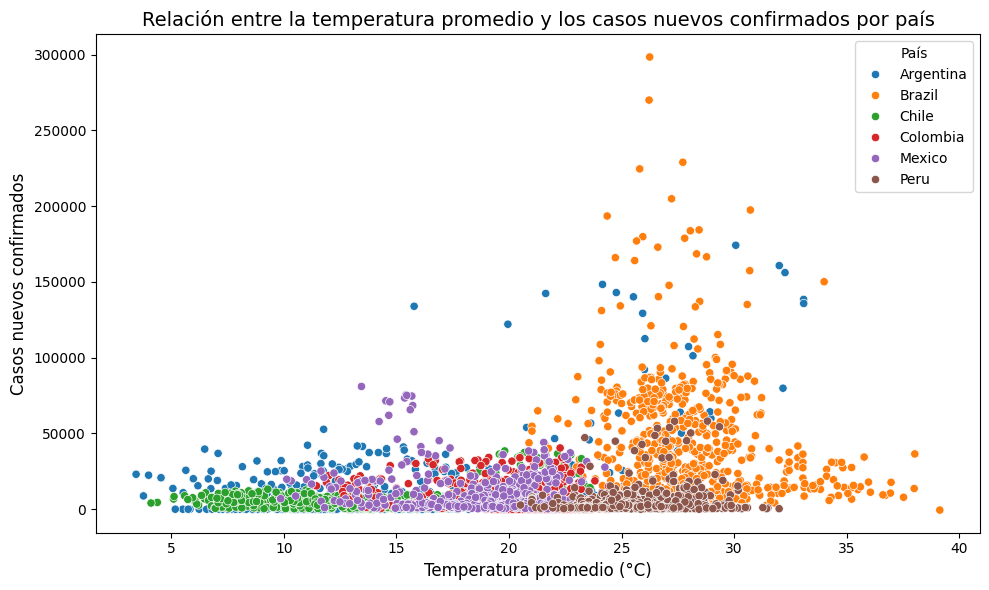

In [24]:
# Gráfico de dispersión: temperatura vs nuevos casos confirmados

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    x="average_temperature_celsius",
    y="new_confirmed",
    data=data_latam_paises,
    hue="country_name"
)
plt.title("Relación entre la temperatura promedio y los casos nuevos confirmados por país", fontsize=14)
plt.xlabel("Temperatura promedio (°C)", fontsize=12)
plt.ylabel("Casos nuevos confirmados", fontsize=12)
plt.legend(title="País")
plt.tight_layout()
plt.show()


Este gráfico de barras muestra el promedio de nuevos casos confirmados para cada país. Permite una comparación directa entre las regiones estudiadas. Se observa que Brasil reporta en promedio una mayor cantidad de casos nuevos, lo que puede estar relacionado con el tamaño de su población o la dinámica de contagio.

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\405166508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


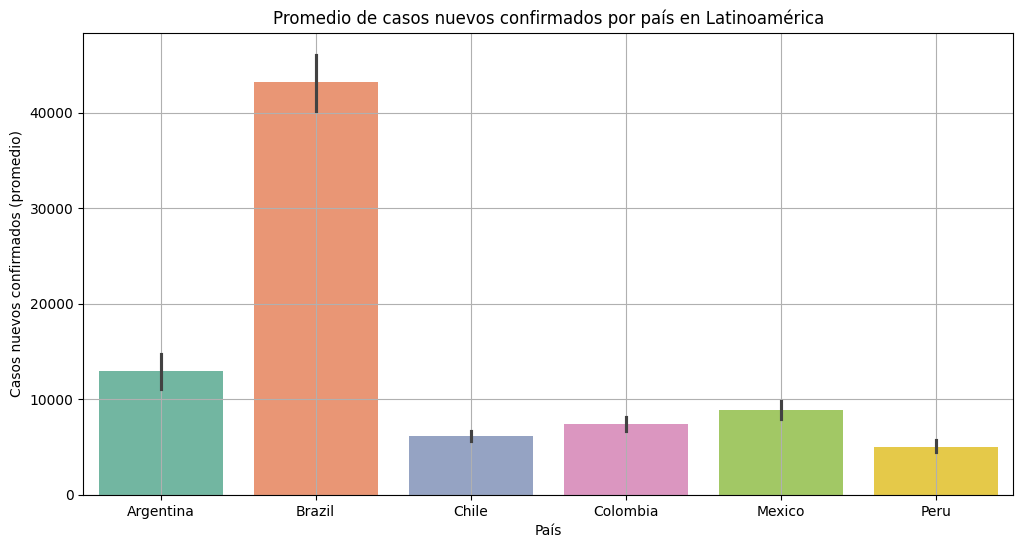

In [25]:
# Gráfico de barras de casos nuevos confirmados por país

colores = sns.color_palette("Set2", 6)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=data_latam_paises,
    x='country_name',
    y='new_confirmed',
    estimator='mean',
    palette=colores
)
plt.title('Promedio de casos nuevos confirmados por país en Latinoamérica')
plt.xlabel('País')
plt.ylabel('Casos nuevos confirmados (promedio)')
plt.grid(True)
plt.show()


Este gráfico muestra el total de muertes confirmadas por COVID-19 en cada uno de los seis países analizados.
Brasil y México presentan las cifras más altas de muertes confirmadas.
Chile y Argentina tienen las cifras más bajas dentro del grupo comparado.
Esta diferencia puede reflejar factores como el tamaño poblacional, acceso a salud, medidas de contención o incluso la calidad del reporte de datos.

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\1477365323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=muertes_por_pais.values, y=muertes_por_pais.index, palette='Reds')


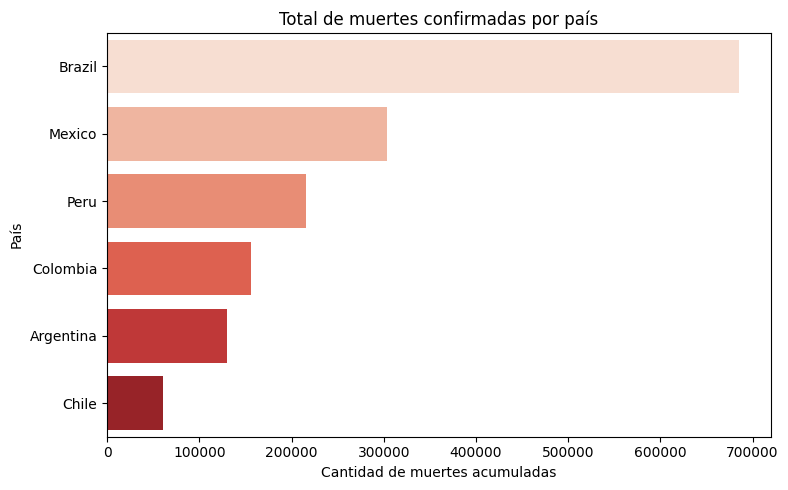

In [26]:
# Agrupar y sumar muertes por país
muertes_por_pais = data_latam_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x=muertes_por_pais.values, y=muertes_por_pais.index, palette='Reds')
plt.title('Total de muertes confirmadas por país')
plt.xlabel('Cantidad de muertes acumuladas')
plt.ylabel('País')
plt.tight_layout()
plt.show()


Este mapa de calor permite observar cómo evolucionaron los casos nuevos confirmados de COVID-19 en cada país mes a mes. Las celdas más oscuras indican meses con mayor promedio de contagios, lo cual facilita identificar periodos críticos o picos epidémicos.
Por ejemplo, en enero y febrero de 2022 se observa un aumento significativo en todos los países, especialmente en Brasil y Argentina, lo que podría estar relacionado con nuevas variantes o eventos estacionales. Este tipo de visualización ayuda a detectar patrones temporales, estacionalidad y momentos clave que deben considerarse para la planificación de medidas sanitarias.

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\683426526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises['mes'] = pd.to_datetime(data_latam_paises['date']).dt.to_period('M').astype(str)


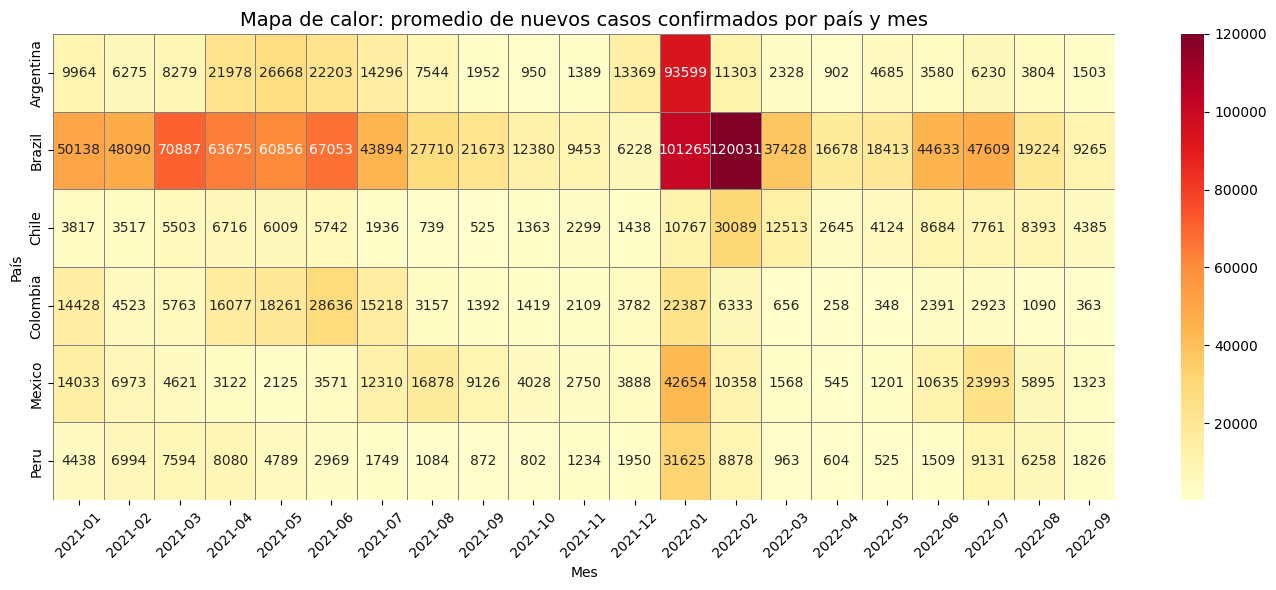

In [27]:
data_latam_paises['mes'] = pd.to_datetime(data_latam_paises['date']).dt.to_period('M').astype(str)

# Agrupar por país y mes, y calcular promedio de casos nuevos
casos_mensuales = data_latam_paises.groupby(['country_name', 'mes'])['new_confirmed'].mean().reset_index()

tabla_calor = casos_mensuales.pivot(index='country_name', columns='mes', values='new_confirmed')

plt.figure(figsize=(14, 6))
sns.heatmap(tabla_calor, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5, linecolor='gray')
plt.title('Mapa de calor: promedio de nuevos casos confirmados por país y mes', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En esta visualización se representa la evolución del promedio mensual de dosis de vacunas administradas en millones, diferenciando por país y por mes. El uso del mapa de calor permite detectar claramente tendencias, puntos de inflexión y ritmos de vacunación distintos entre países.

Observaciones clave:
Brasil  lidera con diferencia el volumen de vacunación durante todo el periodo, superando los 300 millones mensuales desde diciembre de 2021.
México y Argentina muestran también un crecimiento sostenido, especialmente en 2022.
En Perú, se observa una evolución más progresiva, alcanzando su pico en agosto de 2022.
Chile mantiene una tendencia estable y constante en su ritmo de vacunación.
Colombia tuvo un inicio más lento y una disminución drástica hacia el final del periodo.

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\3820146030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latam_paises['mes'] = pd.to_datetime(data_latam_paises['date']).dt.to_period('M').astype(str)


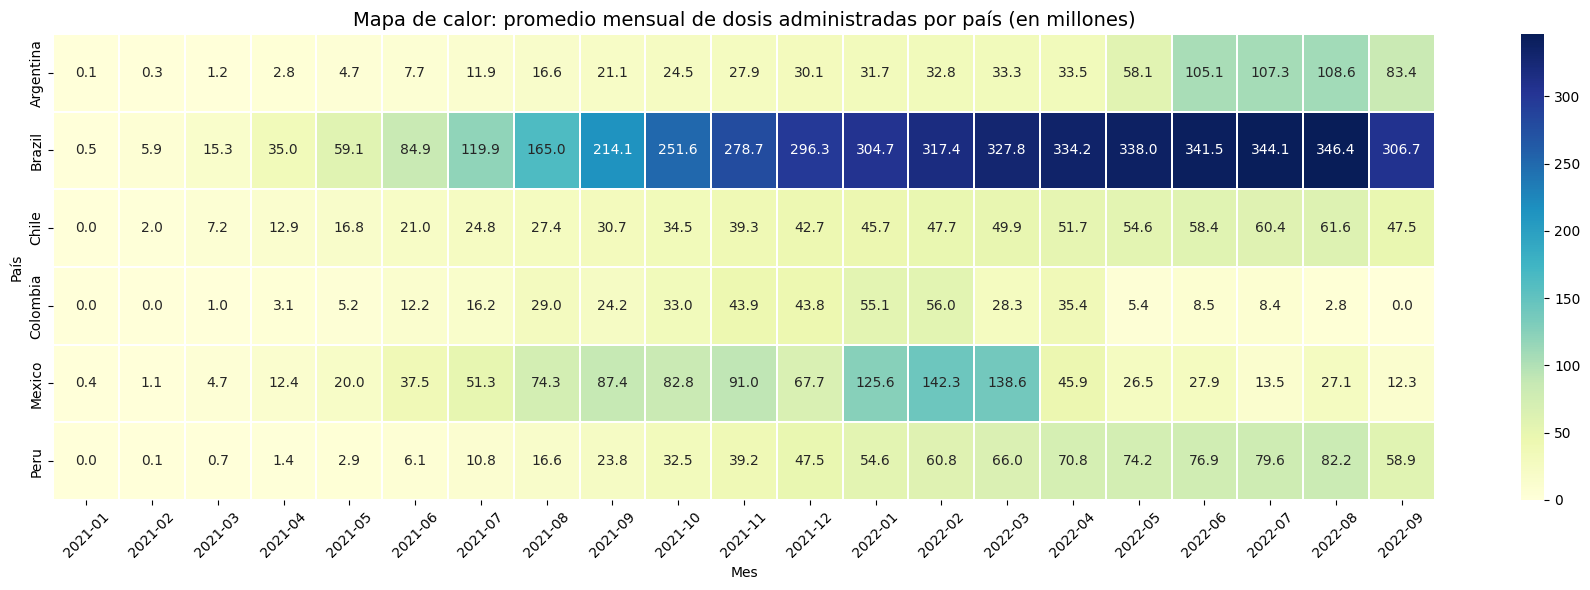

In [28]:
data_latam_paises['mes'] = pd.to_datetime(data_latam_paises['date']).dt.to_period('M').astype(str)
vacunas_por_mes = data_latam_paises.groupby(['country_name', 'mes'])['cumulative_vaccine_doses_administered'].mean().reset_index()
vacunas_pivot = vacunas_por_mes.pivot(index='country_name', columns='mes', values='cumulative_vaccine_doses_administered')

plt.figure(figsize=(18, 6))
sns.heatmap(vacunas_pivot / 1e6, 
            cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.3, linecolor='white')
plt.title('Mapa de calor: promedio mensual de dosis administradas por país (en millones)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este gráfico de caja (boxplot) permite visualizar cómo se distribuye la temperatura promedio (`average_temperature_celsius`) en cada uno de los seis países analizados. En él se muestran los valores mínimos, máximos, cuartiles y posibles valores atípicos, lo que nos ayuda a entender la variabilidad climática entre países.

Aunque el foco principal de este análisis está en los casos de COVID-19 y la vacunación, la temperatura promedio puede ser un factor contextual relevante. Algunos estudios sugieren que las condiciones climáticas podrían influir en la propagación del virus, y también impactar en aspectos logísticos como la conservación y distribución de las vacunas, especialmente en zonas con temperaturas extremas.

Brasil y Perú presentan temperaturas más altas y concentradas, con medianas por encima de los 25 °C.
Chile y Argentina muestran mayor variabilidad térmica, con rangos amplios que reflejan la diversidad climática de su territorio.
México y Colombia tienen distribuciones más estables, pero con valores intermedios entre los países más cálidos y más fríos.

Este análisis puede servir como base para explorar posibles relaciones entre la temperatura y el comportamiento de la pandemia en diferentes momentos del tiempo o regiones.

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\3355335625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


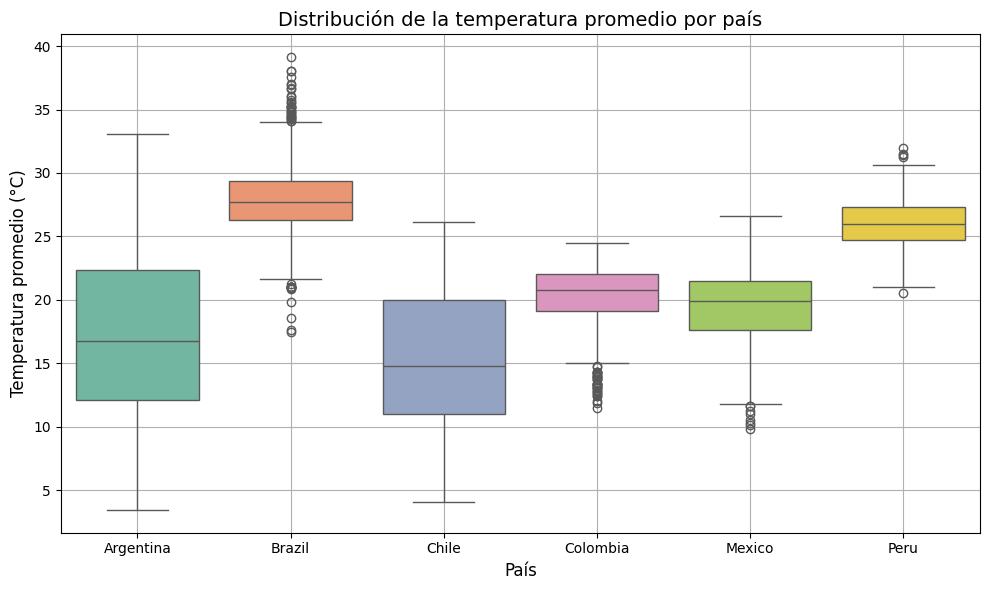

In [29]:
# Boxplot de temperatura promedio por país
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data_latam_paises,
    x="country_name",
    y="average_temperature_celsius",
    palette="Set2"
)
plt.title("Distribución de la temperatura promedio por país", fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Temperatura promedio (°C)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\3949372700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


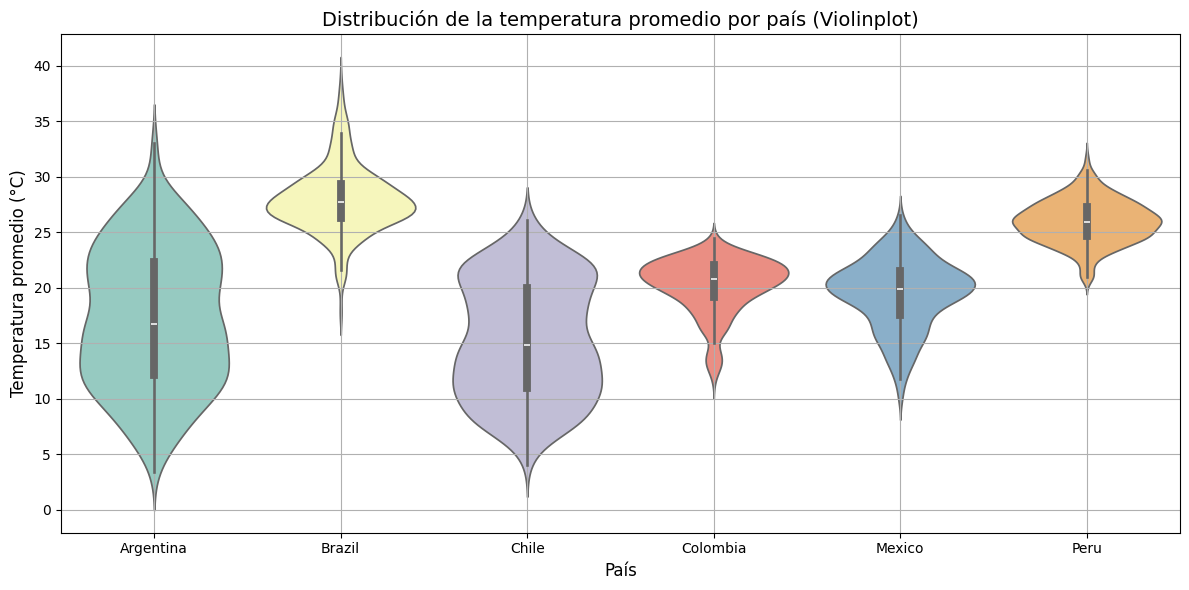

In [30]:
# Gráfico violinplot de temperatura promedio por país
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='country_name', 
    y='average_temperature_celsius', 
    data=data_latam_paises,
    palette='Set3'
)

plt.title("Distribución de la temperatura promedio por país (Violinplot)", fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Temperatura promedio (°C)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra cómo se distribuye, en promedio, la población de cada país entre distintos grupos etarios. La visualización permite detectar diferencias demográficas importantes que pueden influir en la estrategia de vacunación y en la propagación del COVID-19.
Brasil y México presentan las poblaciones más numerosas en todos los rangos, lo cual es consistente con su tamaño poblacional general.
En la mayoría de los países, los grupos entre 20-39 años son los más numerosos, seguidos por los de 0-19 años.
Los grupos de edad 70 años o más tienen valores considerablemente menores, lo cual es esperable, pero también podría indicar la necesidad de estrategias focalizadas en la población más vulnerable.

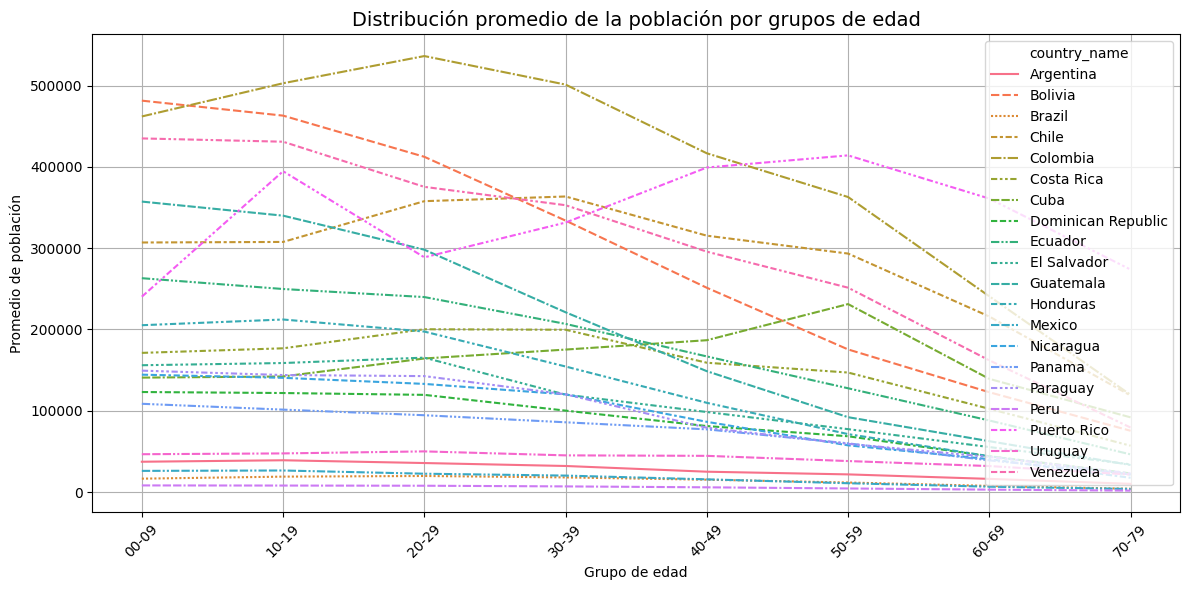

In [ ]:
# Definir las columnas de edad
columnas_edad = [
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_89',
    'population_age_90_99'
]

# Verificar qué columnas existen en el DataFrame actual
columnas_edad_existentes = [col for col in columnas_edad if col in df_final.columns]

# Agrupar por país y calcular el promedio por grupo etario
edad_promedio = df_final.groupby("country_name")[columnas_edad_existentes].mean()

# Transponer para que cada fila sea un grupo etario
edad_promedio = edad_promedio.T

# Renombrar los índices para que se vean bien en el eje X
edad_promedio.index = [r.replace("population_age_", "").replace("_", "-") for r in edad_promedio.index]

# Graficar líneas por país
plt.figure(figsize=(12, 6))
sns.lineplot(data=edad_promedio)
plt.title("Distribución promedio de la población por grupos de edad", fontsize=14)
plt.xlabel("Grupo de edad")
plt.ylabel("Promedio de población")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico de barras compara la tasa de mortalidad adulta entre hombres y mujeres en los seis países analizados.Los datos representan el promedio de la tasa de mortalidad por cada 1,000 adultos.

En todos los países, la mortalidad masculina es significativamente mayor que la femenina.
Brasil y México presentan las tasas más altas de mortalidad adulta masculina (superando los 180 por cada 1,000), lo que podría estar asociado a factores como enfermedades crónicas, violencia o desigualdad en el acceso a servicios de salud.
Chile muestra las tasas más bajas tanto en hombres como en mujeres, lo cual puede reflejar mejores condiciones de vida, infraestructura sanitaria y prevención.

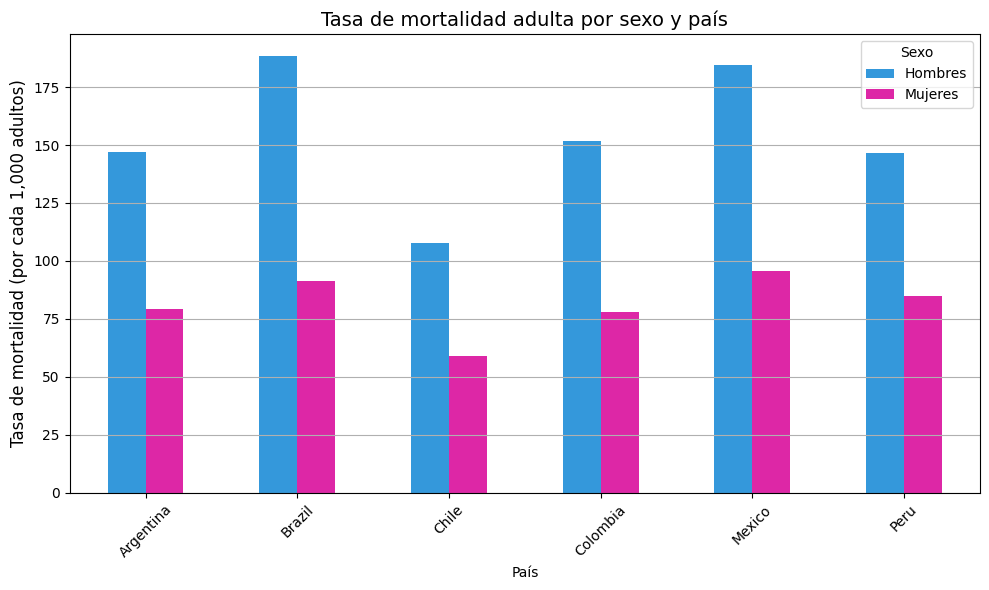

In [32]:
mortalidad_por_sexo = data_latam_paises.groupby('country_name')[
    ['adult_male_mortality_rate', 'adult_female_mortality_rate']
].mean().reset_index()

mortalidad_por_sexo = mortalidad_por_sexo.rename(columns={
    'adult_male_mortality_rate': 'Hombres',
    'adult_female_mortality_rate': 'Mujeres'
})

mortalidad_por_sexo.set_index('country_name').plot(
    kind='bar',
    figsize=(10, 6),
    color=['#3498db', "#dd27a6"]
)

plt.title('Tasa de mortalidad adulta por sexo y país', fontsize=14)
plt.xlabel('País')
plt.ylabel('Tasa de mortalidad (por cada 1,000 adultos)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Esta matriz nos permite analizar cómo se relacionan distintos indicadores demográficos con variables de salud pública (como mortalidad infantil, enfermedades crónicas o acceso a personal médico).

Hay una alta correlación positiva entre el índice de desarrollo humano y la esperanza de vida, lo cual es lógico ya que en países más desarrollados la calidad de vida y el acceso a la salud suelen ser mejores.

Se observa correlación negativa entre la mortalidad por comorbilidades y esperanza de vida, lo cual sugiere que a mayor carga de enfermedades crónicas, menor esperanza de vida.

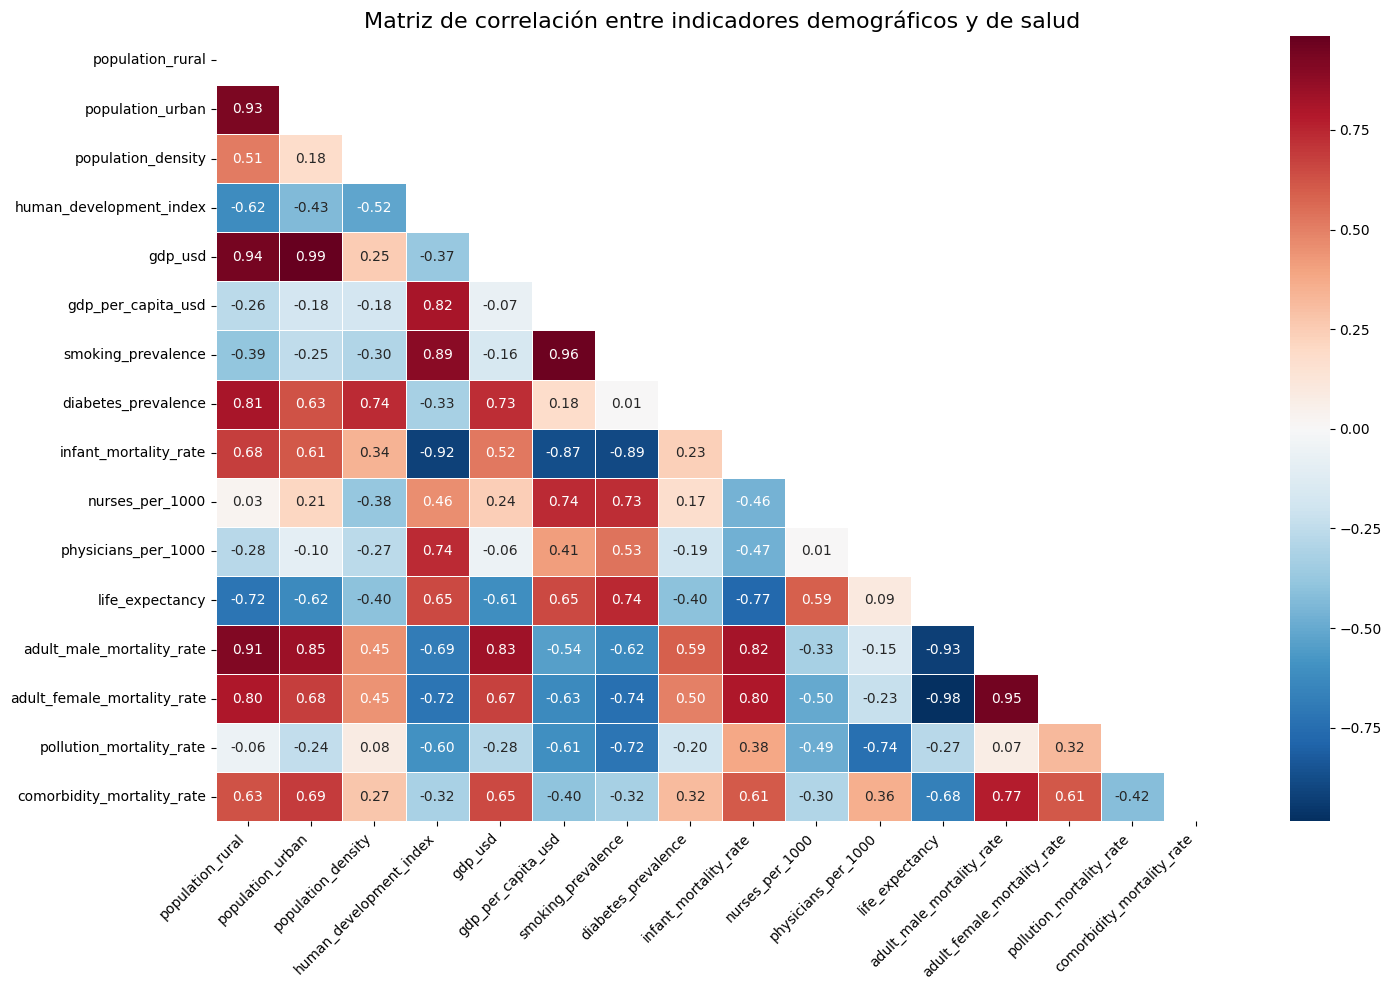

In [33]:

# Seleccionar las columnas demográficas y de salud
columnas_interes = [
    'population_rural', 'population_urban', 'population_density',
    'human_development_index', 'gdp_usd', 'gdp_per_capita_usd',
    'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
    'nurses_per_1000', 'physicians_per_1000',
    'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate',
    'pollution_mortality_rate', 'comorbidity_mortality_rate'
]
matriz_corr = data_latam_paises[columnas_interes].corr()

mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(matriz_corr, annot=True, mask=mask, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre indicadores demográficos y de salud", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Avance 3

Para realizar análisis temporales en Pandas, es necesario que el índice del DataFrame sea una columna de tipo fecha (`datetime`). Por eso, convertimos la columna `date` y la usamos como índice.
Esto nos permite aplicar funciones como `.resample()`, que agrupan los datos por un intervalo de tiempo, como semanas, meses o años. Si no realizamos esta conversión, Pandas no puede identificar correctamente los intervalos de tiempo y lanza un error.
Este paso es fundamental para que podamos visualizar correctamente la evolución de casos o muertes en el tiempo.


In [ ]:
df_final['date'] = pd.to_datetime(df_final['date'])

df_final.set_index('date', inplace=True)


In [47]:
df_final.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17'],
              dtype='datetime64[ns]', name='date', length=3744, freq=None)

En este gráfico analizamos la evolución de los nuevos casos confirmados de COVID-19 agrupados por semana. Para ello, utilizamos la función `resample('W')`, que agrupa automáticamente los datos por intervalos semanales de lunes a domingo, sumando los casos reportados en esos días.

Como se puede observar, durante el inicio del 2022 se produjo un pico extremadamente alto en nuevos casos semanales. El comportamiento observado permite a la empresa farmacéutica anticipar momentos de alta demanda en servicios de salud y planificar su expansión estratégica.


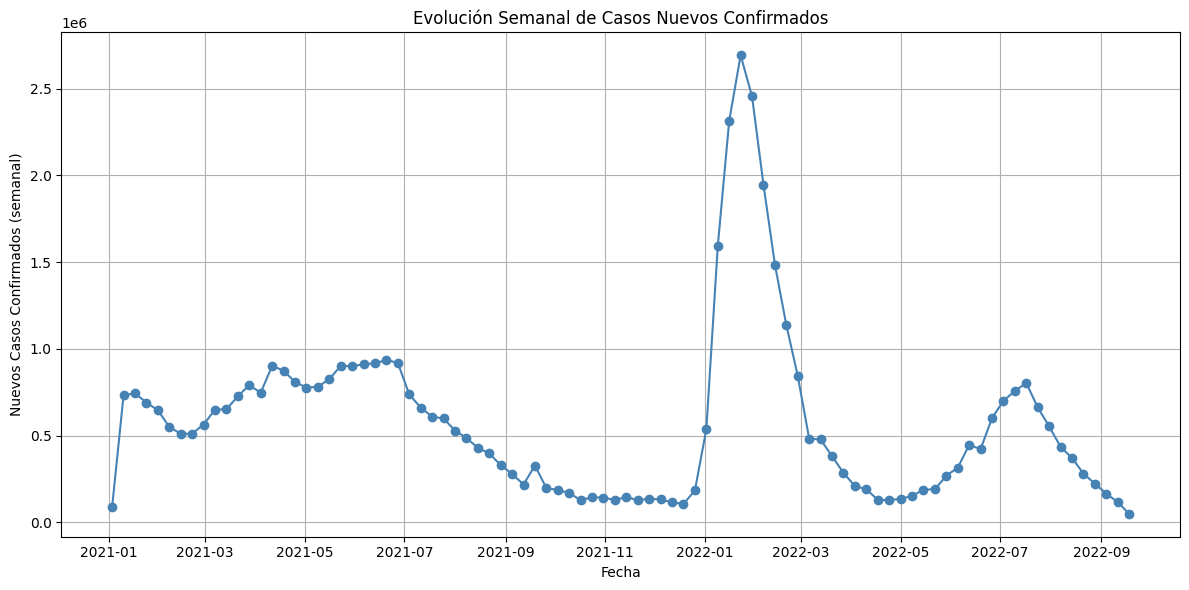

In [49]:
# Agrupar por semana y calcular la suma de nuevos casos confirmados
casos_semanales = df_final.resample('W').sum(numeric_only=True)['new_confirmed']

# Graficar
plt.figure(figsize=(12,6))
plt.plot(casos_semanales, marker='o', linestyle='-', color='steelblue')
plt.title('Evolución Semanal de Casos Nuevos Confirmados')
plt.xlabel('Fecha')
plt.ylabel('Nuevos Casos Confirmados (semanal)')
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico compara, de forma mensual, dos indicadores clave en el monitoreo de la pandemia: los casos activos estimados y los casos recuperados.
Para estimar los casos activos, se utilizó la siguiente fórmula: Casos activos = Casos confirmados - (Recuperados + Fallecidos)

En la gráfica se observa que a principios de 2022 hay un pico abrupto de casos activos, mientras que los recuperados siguen un patrón más estable. Esto indica un momento de alta propagación con una recuperación más lenta, probablemente asociado a una ola intensa de contagios.

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\1184907225.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  activos_vs_recuperados = df_final[['casos_activos_estimados', 'new_recovered']].resample('M').sum()


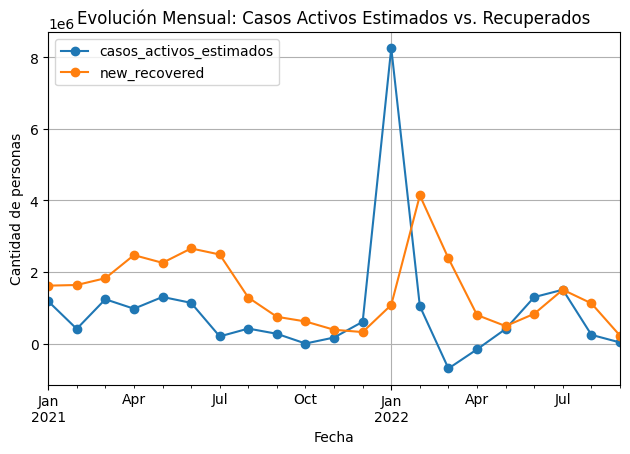

In [ ]:
df_final[['new_recovered', 'new_confirmed', 'new_deceased']] = df_final[[
    'new_recovered', 'new_confirmed', 'new_deceased']].fillna(0)

df_final['casos_activos_estimados'] = df_final['new_confirmed'] - (
    df_final['new_recovered'] + df_final['new_deceased'])

activos_vs_recuperados = df_final[['casos_activos_estimados', 'new_recovered']].resample('M').sum()

activos_vs_recuperados.plot(marker='o')
plt.title('Evolución Mensual: Casos Activos Estimados vs. Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de personas')
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico muestra la variación porcentual de los casos confirmados de COVID-19, calculada como la tasa de crecimiento semana a semana. Se utilizó la función `pct_change()` sobre la columna de casos confirmados (`new_confirmed`), y luego se agrupó por semana (`resample('W')`) para suavizar el comportamiento.

Una tasa positiva indica aumento respecto a la semana anterior; una tasa negativa, una disminución. Se puede ver que durante la semana que coincide con el inicio de 2022, hubo un crecimiento explosivo de más del 500%, lo que refleja un brote masivo.
Esto sugiere que el virus tuvo una expansión muy acelerada en ciertos momentos, lo cual puede ser clave para anticipar necesidades en infraestructura sanitaria y logística farmacéutica.

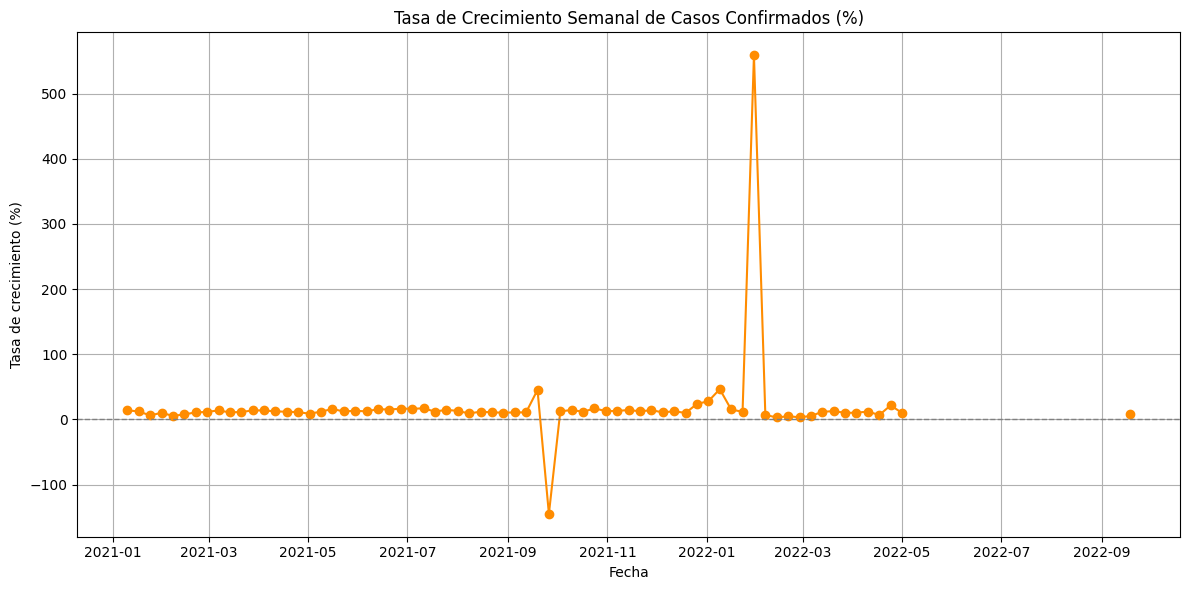

In [53]:
# Calcular tasa de crecimiento diaria en porcentaje
df_final['tasa_crecimiento_%'] = df_final['new_confirmed'].pct_change() * 100

# Agrupar por semana y obtener promedio para suavizar
crecimiento_semanal = df_final['tasa_crecimiento_%'].resample('W').mean()

# Graficar
plt.figure(figsize=(12,6))
plt.plot(crecimiento_semanal, color='darkorange', marker='o')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Tasa de Crecimiento Semanal de Casos Confirmados (%)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico analiza cómo evolucionaron en paralelo la cantidad de dosis acumuladas de vacunas aplicadas y los nuevos casos confirmados de COVID-19.

El eje verde representa la cobertura de vacunación acumulada.
El eje rojo muestra el promedio mensual de nuevos casos confirmados.

A lo largo del tiempo, se observa que a medida que aumentan las dosis acumuladas aplicadas, los casos tienden a disminuir, especialmente después del tercer trimestre de 2021. Esto sugiere una posible relación inversa entre la cobertura de vacunación y la propagación del virus.
Sin embargo, también se aprecia un pico inesperado de casos a inicios de 2022 a pesar de una alta cobertura, lo que podría deberse a factores como nuevas variantes del virus

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\2528164689.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vacunas_vs_casos = df_final[['cumulative_vaccine_doses_administered', 'new_confirmed']].resample('M').mean()


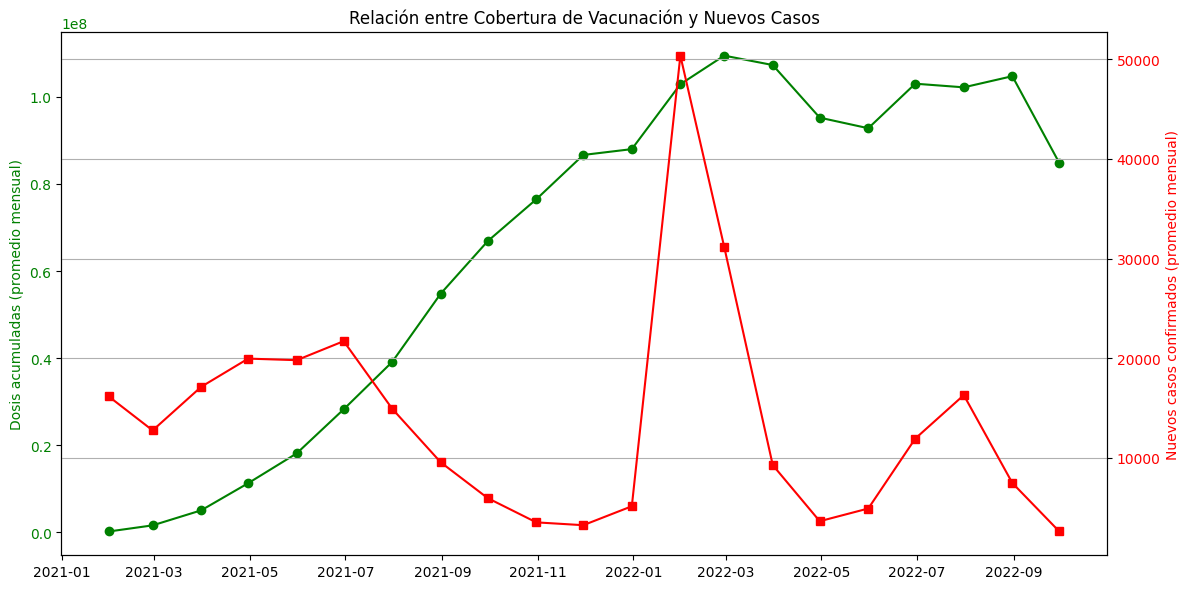

In [55]:
vacunas_vs_casos = df_final[['cumulative_vaccine_doses_administered', 'new_confirmed']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(vacunas_vs_casos.index, vacunas_vs_casos['cumulative_vaccine_doses_administered'], color='green', marker='o')
ax1.set_ylabel('Dosis acumuladas (promedio mensual)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(vacunas_vs_casos.index, vacunas_vs_casos['new_confirmed'], color='red', marker='s')
ax2.set_ylabel('Nuevos casos confirmados (promedio mensual)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Relación entre Cobertura de Vacunación y Nuevos Casos')
plt.grid(True)
fig.tight_layout()
plt.show()

En este gráfico se visualiza la evolución mensual de las dosis acumuladas de vacunación. Los datos fueron agrupados por mes utilizando `groupby()` con `Grouper(freq='M')`, lo que permitió suavizar las variaciones diarias y facilitar la comparación entre países.
Se puede observar que Brasil tiene la curva más alta y sostenida, reflejando una campaña de vacunación masiva, México y Colombia presentan algunas irregularidades, Argentina, Chile y Perú muestran un crecimiento constante pero más gradual.
Este tipo de visualización permite detectar qué países avanzaron más rápido en su cobertura de vacunación y puede ser útil para priorizar recursos, inversiones o alianzas estratégicas en el sector salud.


C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\469702859.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vacunas_mensual = df_final.groupby([pd.Grouper(key='fecha', freq='M'), 'country_name'])['cumulative_vaccine_doses_administered'].mean().reset_index()


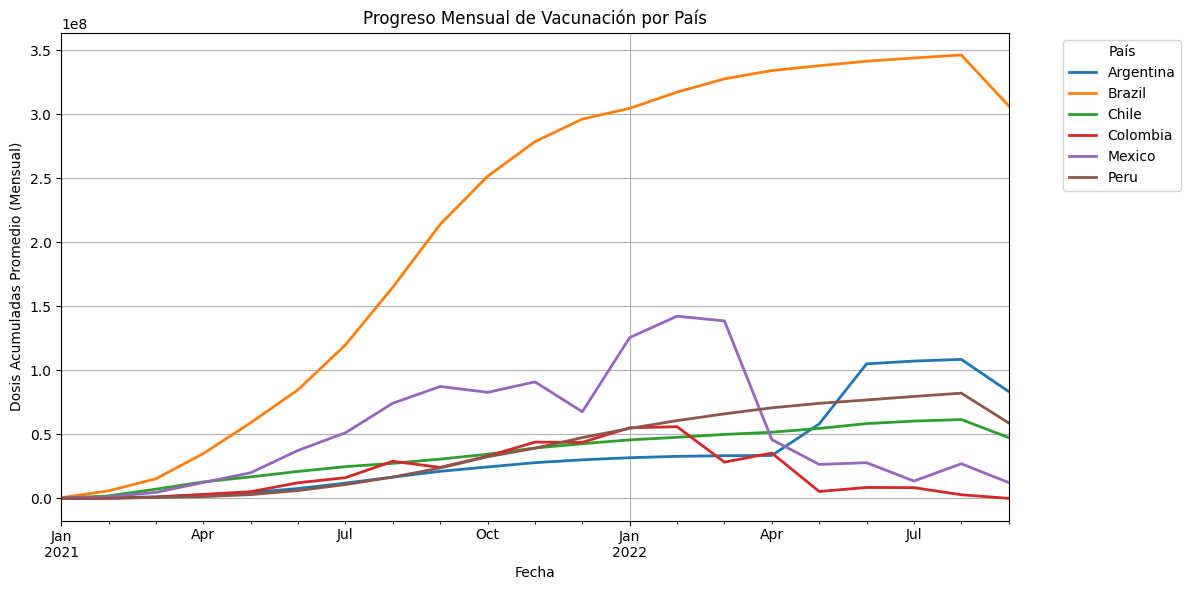

In [65]:
vacunas_mensual = df_final.groupby([pd.Grouper(key='fecha', freq='M'), 'country_name'])['cumulative_vaccine_doses_administered'].mean().reset_index()

vacunas_pivot = vacunas_mensual.pivot(index='fecha', columns='country_name', values='cumulative_vaccine_doses_administered')

ax = vacunas_pivot.plot(figsize=(12, 6), linewidth=2)

plt.title('Progreso Mensual de Vacunación por País')
plt.xlabel('Fecha')
plt.ylabel('Dosis Acumuladas Promedio (Mensual)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico permite observar si existe algún patrón estacional en la propagación del COVID-19, relacionando los nuevos casos confirmados con la temperatura promedio mensual.
El eje rojo muestra el promedio mensual de nuevos casos confirmados. El eje azul representa la temperatura promedio en °C.
Se observa que los picos de contagios no ocurren necesariamente en los meses más fríos o calurosos, lo que sugiere que la temperatura, por sí sola, no explica la evolución de los casos. Sin embargo, sí puede tener un papel indirecto al influir en comportamientos sociales como la ventilación, la aglomeración o la movilidad.
Este análisis permite descartar una correlación fuerte directa entre clima y contagios.

C:\Users\cammh\AppData\Local\Temp\ipykernel_22556\1147189590.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  casos_vs_temp = df_final[['new_confirmed', 'average_temperature_celsius']].resample('M').mean()


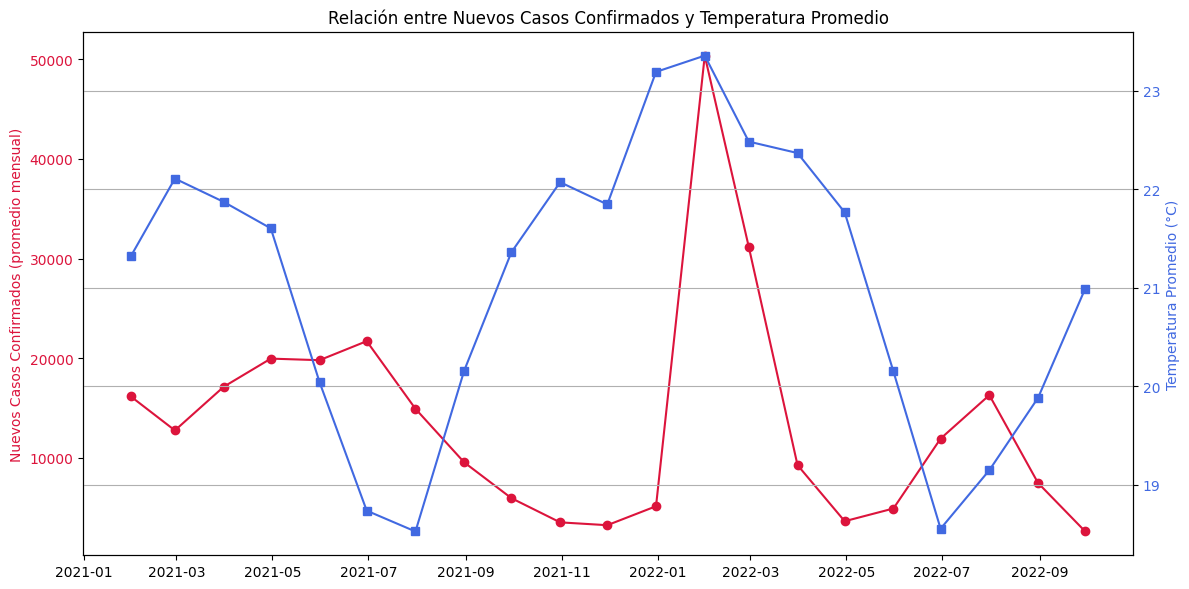

In [68]:
casos_vs_temp = df_final[['new_confirmed', 'average_temperature_celsius']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(casos_vs_temp.index, casos_vs_temp['new_confirmed'], color='crimson', marker='o')
ax1.set_ylabel('Nuevos Casos Confirmados (promedio mensual)', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

ax2 = ax1.twinx()
ax2.plot(casos_vs_temp.index, casos_vs_temp['average_temperature_celsius'], color='royalblue', marker='s')
ax2.set_ylabel('Temperatura Promedio (°C)', color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

plt.title('Relación entre Nuevos Casos Confirmados y Temperatura Promedio')
plt.grid(True)
fig.tight_layout()
plt.show()


En este gráfico analizamos si existe relación entre el nivel de urbanización de un país y la cantidad promedio de nuevos casos confirmados de COVID-19.
Cada punto representa un país, y se puede observar una tendencia clara en la que los países más urbanizados como Brasil concentra mayores niveles de contagio. Esto puede deberse a una mayor densidad de población o movilidad

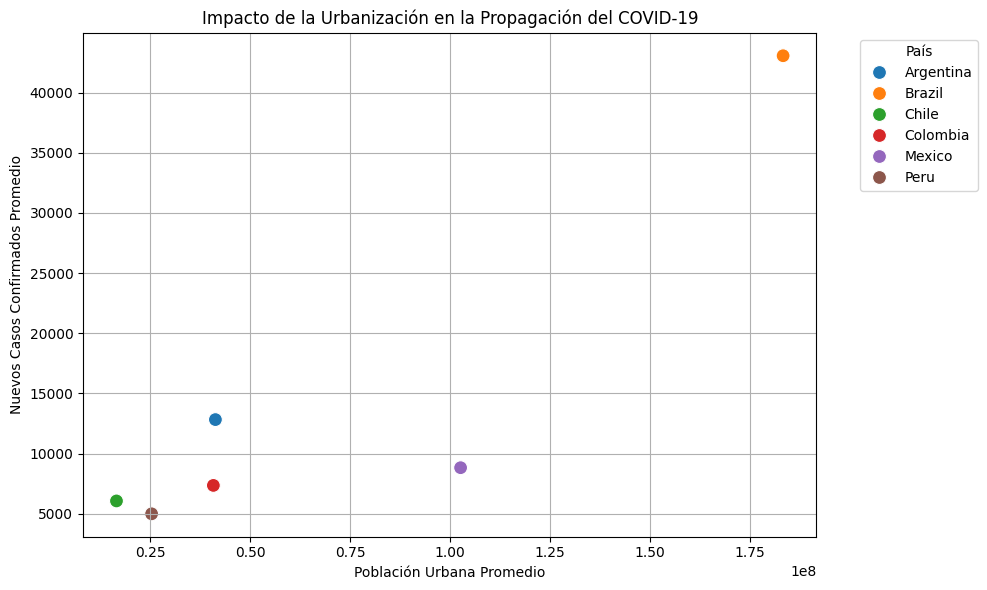

In [71]:
urbano_vs_casos = df_final.groupby('country_name')[['population_urban', 'new_confirmed']].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=urbano_vs_casos, x='population_urban', y='new_confirmed', hue='country_name', s=100)

plt.title('Impacto de la Urbanización en la Propagación del COVID-19')
plt.xlabel('Población Urbana Promedio')
plt.ylabel('Nuevos Casos Confirmados Promedio')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico de barras muestra el total de nuevos casos confirmados de COVID-19 por año y por país. Se utilizó la columna `new_confirmed`, agrupando los datos por `country_name` y por año (`año`), para observar la evolución global de contagios entre 2021 y 2022.
Brasil tuvo una cantidad significativamente mayor de casos en ambos años, reflejando tanto su alta población como la intensidad de la propagación del virus.
En la mayoría de los países se observa una disminución de casos de 2021 a 2022, lo cual podría estar vinculado al avance de la vacunación

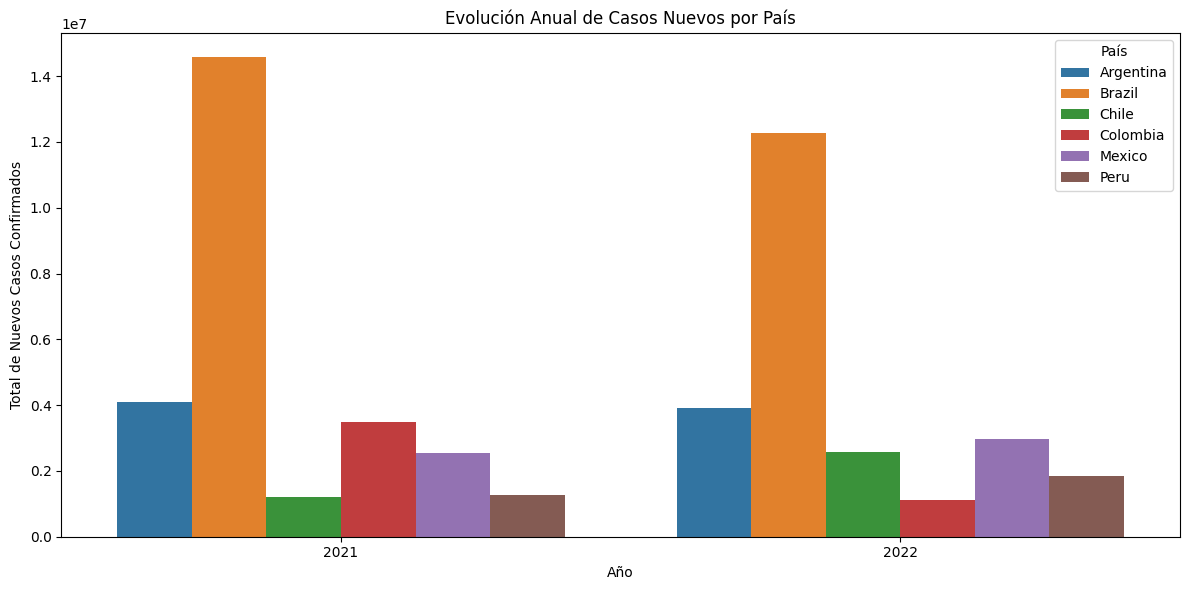

In [75]:
df_final['año'] = df_final.index.year  # Extraer año desde el índice

casos_anuales = df_final.groupby(['country_name', 'año'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=casos_anuales, x='año', y='new_confirmed', hue='country_name')
plt.title('Evolución Anual de Casos Nuevos por País')
plt.xlabel('Año')
plt.ylabel('Total de Nuevos Casos Confirmados')
plt.legend(title='País')
plt.tight_layout()
plt.show()


Este mapa interactivo muestra la cantidad acumulada de muertes por COVID-19 en seis países: Argentina, Brasil, Chile, Colombia, México y Perú. 
Cada marcador representa un país y al hacer clic en él se despliega un cuadro emergente con el nombre del país y el número de muertes acumuladas 


In [90]:
import folium

df_final = df_final.rename(columns={'atitude': 'latitude'})

datos_mapa = df_final.reset_index().sort_values('date')
datos_mapa = datos_mapa[
    datos_mapa['country_name'].isin(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Perú']) &
    datos_mapa['latitude'].notnull() &
    datos_mapa['longitude'].notnull()
]

datos_ultimos = (
    datos_mapa.sort_values('date', ascending=False)
    .dropna(subset=['cumulative_deceased']) 
    .drop_duplicates('country_name', keep='first')
)

mapa = folium.Map(location=[-15, -60], zoom_start=3)
for _, row in datos_ultimos.iterrows():
    fallecidos = (
        int(row['cumulative_deceased']) if pd.notnull(row['cumulative_deceased']) else 'No disponible'
    )

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"""
            <b>{row['country_name']}</b><br>
            Muertes acumuladas: {fallecidos}
        """, max_width=250),
        tooltip=row['country_name']
    ).add_to(mapa)

# Mostrar el mapa
mapa
